In [ ]:
import requests
def connected_to_internet(url='http://www.google.com/', timeout=50):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        print("No internet connection available.")
    return False

connected_to_internet()

In [ ]:
#!pip install -r requirements.txt
#!pip install fxcmpy
#!pip install forexconnect
#!pip install sklearn
#!pip install statsmodels
#!pip install matplotlib
#!pip install ipywidgets
#!pip install scipy
#!pip install pymysql 
#!pip install pynverse
#!pip install datascience
#!pip install pomegranate

In [8]:
import os
import threading
import time
import importlib
import sys
import warnings
mpath = os.getcwd() + '/lib'
sys.path.append(mpath)

In [9]:
#from forexconnect import fxcorepy
import fxcmpyi
import pandas
import matplotlib

import SharedObjects
import pairs
import Copula
importlib.reload(Copula)
importlib.reload(SharedObjects)
importlib.reload(fxcmpyi)
importlib.reload(pairs)

import numpy

In [10]:
#fxcmpy.__version__

minutes: m1, m5, m15 and m30,
hours: H1, H2, H3, H4, H6 and H8,
one day: D1,
one week: W1,
one month: M1.

In [11]:
#Set variables
T = 'm1' #Period
sz = 1000; #Size
prs = dict()
pr_mlreg = dict()
mlr = pandas.DataFrame()

Get access token from https://tradingstation.fxcm.com.

demo - for account type demo

real - for account type real

In [12]:
con = None
def custom():
    global con
    try:
        def login():
            global con
            TOKEN = '2720337434ea557dea25bad4cd9ad392d70f620d'
            con = fxcmpyi.fxcmpy(access_token=TOKEN, log_level='error', server='demo')
            return
        threading.Thread(target=login).start()
    except:
        custom()
custom()
#con.close()

In [16]:
if con is not None:
    shd_obj = SharedObjects.SharedObjects(con)
    print(con.is_connected())

True


In [17]:
#Function to update data
def price_update(data = None, dataframe = None):
    symbol = data['Symbol']
    def misc():
        global pr_mlreg, mlr, shd_obj, prs
        if (symbol in prs):
            #pr_mlreg[symbol] = prs.get(symbol).multiple_linear_regression(prs)
            #mlr = shd_obj.mergeall_byrow(pr_mlreg)
            prs.get(symbol).standardize_prices()
            resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
            shd_obj.update(prs, resp[0], resp[1])
    threading.Thread(target=misc).start()

def stream():
    for symbol in shd_obj.tradable_pairs:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            shd_obj.stream_data(symbol, (price_update, prs.get(symbol).on_price_update) )

In [18]:
def get_past_prices():
    for symbol in shd_obj.tradable_pairs:
        dtf = shd_obj.historical_data(symbol, T, sz)
        if symbol not in prs:
            prs[symbol] = pairs.Pair(symbol, dtf)
            prs.get(symbol).standardize_prices()
            resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
            shd_obj.update(prs, resp[0], resp[1])
            
        syz = len(prs.get(symbol).standardized_prices)
        strm = False
        for sym in shd_obj.tradable_pairs:
            if(hasattr(prs.get(sym), 'standardized_prices') and syz == len(prs.get(sym).standardized_prices)):
                strm = True
            else:
                strm = False
        if(strm == True):
            threading.Thread(target=stream).start()
                
threading.Thread(target=get_past_prices).start()

#Stream Tradable Pairs

In [ ]:
#shd_obj.unstream_data()

In [ ]:
#con.close()

In [ ]:
#status = shd_obj.get_status()
#if(status == 'You are logged in'):
    #shd_obj.stream_data(T, sz, price_update)

In [ ]:
##Reverses the dataframe rows
#df[::-1]

#con.is_subscribed(instruments[0])
#con.get_subscribed_symbols()

#con.unsubscribe_market_data('EUR/USD')
#print(shd_obj.pairs)
#con.close()

In [ ]:
#con.get_default_account()
#con.get_prices('EUR/USD')

In [ ]:
#import inspect
#source_file_DF = inspect.getsource(pandas.DataFrame().join)
#print(source_file_DF)

In [61]:
shd_obj.coint_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.958532,0.112612,0.246955,0.067471,0.096177,0.018633,0.099539,0.090269,0.016350,0.051938
USD/JPY,0.638572,0.968944,0.555088,0.605971,0.468451,0.600756,0.544465,0.570332,0.592518,0.511658
GBP/USD,0.972727,0.950429,0.999000,0.987681,0.221550,0.056861,0.897315,0.030174,0.002411,0.069212
USD/CHF,0.201127,0.302643,0.653382,0.976376,0.369108,0.351672,0.241606,0.550014,0.448484,0.366383
AUD/USD,0.890321,0.774650,0.101504,0.931486,0.811458,0.569930,0.735684,0.046093,0.272744,0.011260
USD/CAD,0.294042,0.832209,0.019087,0.845131,0.424549,0.999000,0.734577,0.222105,0.000890,0.104092
NZD/USD,0.062991,0.057577,0.057838,0.053878,0.044570,0.055623,0.953566,0.048593,0.038847,0.034232
EUR/GBP,0.983838,0.983350,0.115939,0.993682,0.219733,0.731084,0.955400,0.985895,0.456290,0.383998
USD/ZAR,0.271552,0.884411,0.000696,0.931121,0.195768,0.000873,0.701700,0.094438,0.999000,0.023485
ZAR/JPY,0.714310,0.835439,0.028967,0.937877,0.009799,0.146348,0.662620,0.090348,0.032680,0.878004


In [65]:
plot0 = None
plot1 = None
def doplot():
    y = 'GBP/USD'
    x = 'USD/ZAR'
    plot0 = shd_obj.pairwise_spreadplot(y, x)
    plot0 = shd_obj.pairwise_plot(y, x)
threading.Thread(target=doplot).start()

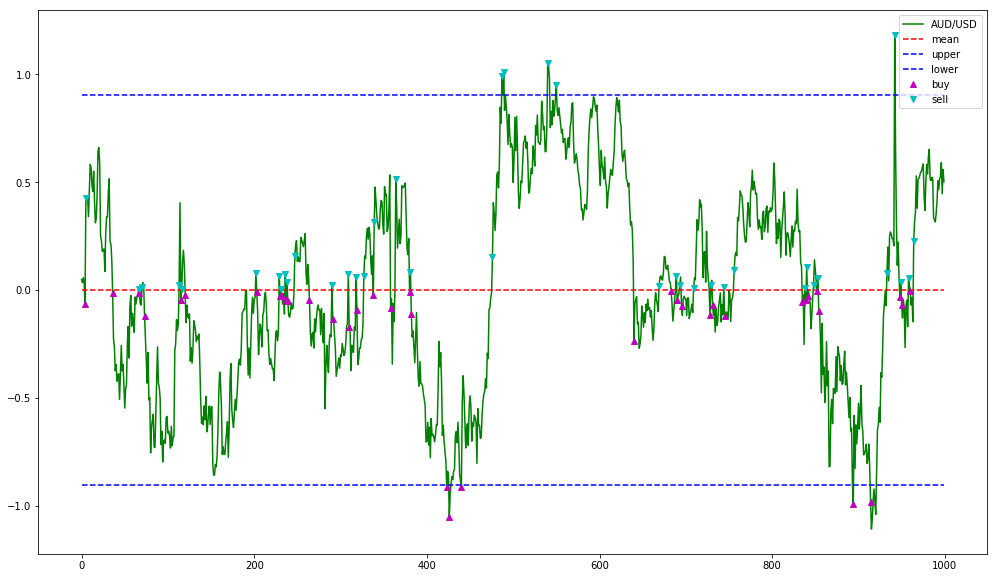

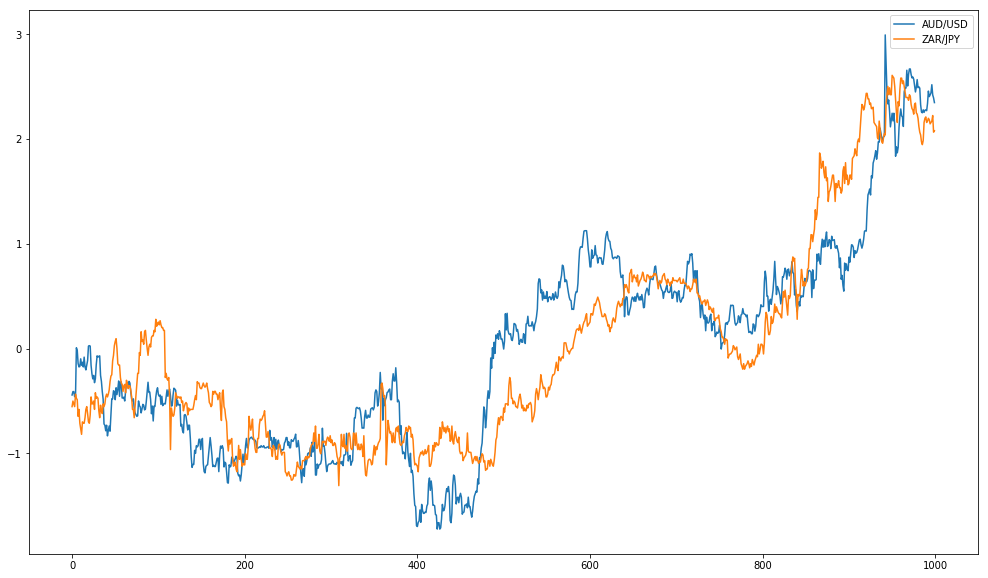

In [60]:
#Plots

In [63]:
#shd_obj.pair_selection()
shd_obj.ipairs
#shd_obj.corr_mat

[]

In [64]:
shd_obj.corr_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.000000,-0.122422,0.470104,-0.287919,0.161686,-0.349217,0.216534,0.084249,-0.181099,0.162105
USD/JPY,-0.122422,0.000000,0.143074,0.052158,0.574120,-0.061838,0.121792,-0.317291,-0.153523,0.493309
GBP/USD,0.470104,0.143074,0.000000,-0.342183,0.437155,-0.295147,0.239646,-0.433222,-0.285443,0.352356
USD/CHF,-0.287919,0.052158,-0.342183,0.000000,-0.131266,0.118955,0.131810,0.184298,0.096397,-0.037286
AUD/USD,0.161686,0.574120,0.437155,-0.131266,0.000000,-0.332083,0.332811,-0.489172,-0.400501,0.675719
USD/CAD,-0.349217,-0.061838,-0.295147,0.118955,-0.332083,0.000000,-0.163665,0.154101,0.332263,-0.296032
NZD/USD,0.216534,0.121792,0.239646,0.131810,0.332811,-0.163665,0.000000,-0.108329,-0.226889,0.249366
EUR/GBP,0.084249,-0.317291,-0.433222,0.184298,-0.489172,0.154101,-0.108329,0.000000,0.350840,-0.432616
USD/ZAR,-0.181099,-0.153523,-0.285443,0.096397,-0.400501,0.332263,-0.226889,0.350840,0.000000,-0.487317
ZAR/JPY,0.162105,0.493309,0.352356,-0.037286,0.675719,-0.296032,0.249366,-0.432616,-0.487317,0.000000


In [ ]:
#shd_obj.start = True
#shd_obj.start

In [ ]:
#importlib.reload(Copula)

In [ ]:
#pr = shd_obj.ipairs[4]
#dat = pandas.DataFrame()
#dat[pr[0]] = shd_obj.dataset0[pr[0]]
#dat[pr[1]] = shd_obj.dataset0[pr[1]]
#cop = Copula.copula(prs, pr, dat)
#cop.misprice_index(dat)